<a href="https://colab.research.google.com/github/semihkoc1/python-app/blob/main/Police_killings_Semih1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings


INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [ ]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

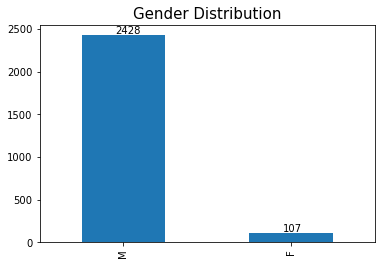

In [ ]:
# with pandas

fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

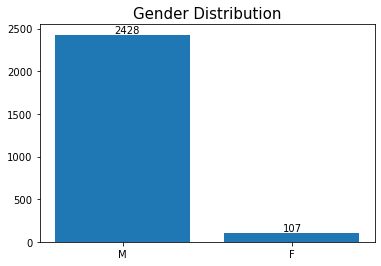

In [ ]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

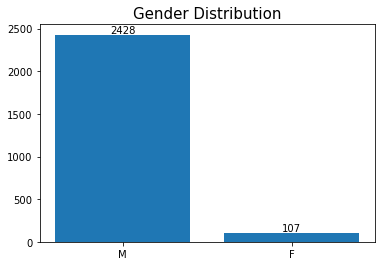

In [ ]:
# alternatif solution

x= kill.gender.value_counts().index
y= kill.gender.value_counts().values

plt.bar(x,y)
plt.title("Gender Distribution", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' ) 



## 2: Plot 7 most common kill weapons

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.armed.value_counts()[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [ ]:
kill.armed.value_counts(dropna=False)[:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [ ]:
common_weapons = kill.armed.value_counts(dropna=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

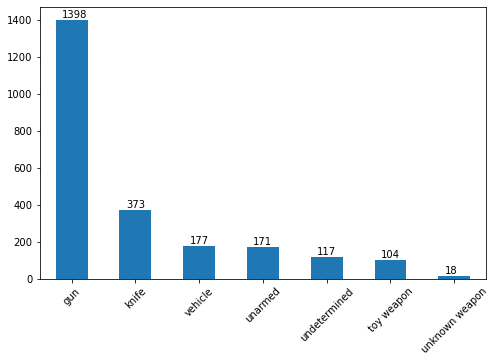

In [ ]:
# with pandas
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar',ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

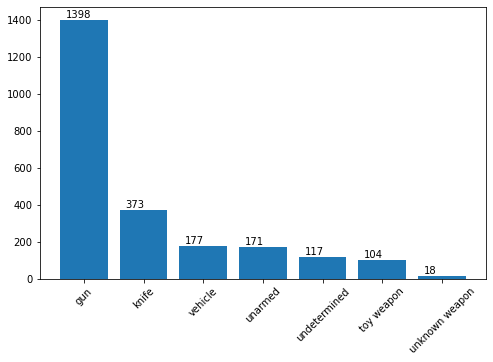

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >=25 else ("below25" if x<25 else "others"))

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

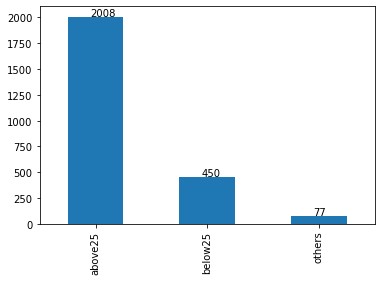

In [ ]:
# with pandas
ax = age_class.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

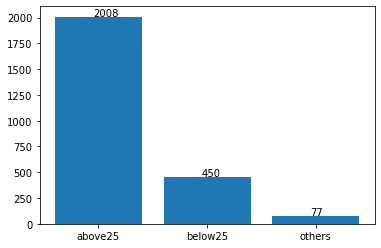

In [ ]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height= age_class.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

## 4: Plot number of killed poeple by race

In [ ]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

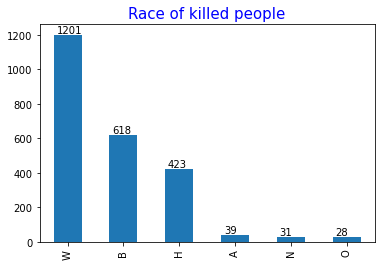

In [ ]:
# with pandas
ax = race_freq.plot.bar()
ax.set_title('Race of killed people',color = 'blue',fontsize=15);
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

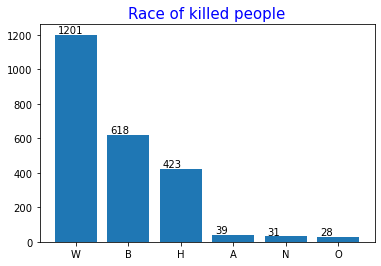

In [ ]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x=race_freq.index, height=race_freq.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

## 5: Killed People According to Races (Pie Chart)

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [ ]:
kill.dropna(inplace=True)

In [ ]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [ ]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

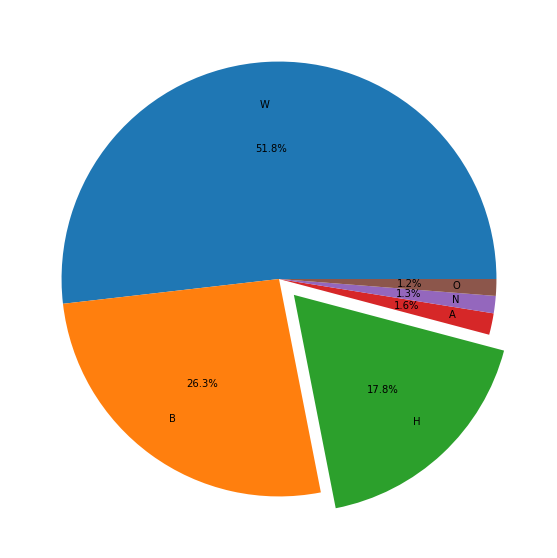

In [ ]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(x = sizes, 
        explode=explode, 
        labels=labels, 
        labeldistance=0.8,
        autopct='%.1f%%',

#         shadow=True, 
        startangle=0,
#         radius=1.5,
       );

## 6: Most common 15 Name or Surname of killed people 

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill.shape

(2254, 15)

In [ ]:
kill.name.value_counts()

Michael Johnson             2
Eric Harris                 2
Daquan Antonio Westbrook    2
Brandon Jones               2
Michael Brown               2
                           ..
Bernard Brandon Powers      1
Kevin Lau                   1
Joe Pasquez Ortiz           1
Anthony Aguilar             1
Dwayne Jeune                1
Name: name, Length: 2249, dtype: int64

In [ ]:
kill[kill.name == 'TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
2465,2748,TK TK,05/07/17,shot,undetermined,24.0,M,H,Vista,CA,False,undetermined,Foot,False,below25


In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [ ]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

 devam

In [ ]:
pairs.shape

(2253,)

In [ ]:
pairs[0]

['Tim', 'Elliot']

In [ ]:
pairs[0][0]

'Tim'

In [ ]:
table=[]
for i in pairs:
  for j in i:
    table.append(j)

In [ ]:
len(table)

5339

In [ ]:
from collections import Counter
most_common_names=Counter(table)
most_common_names

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

In [ ]:
most_common_names=Counter(table)
dir (most_common_names)

['__add__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'update',
 'values']

In [ ]:
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

In [ ]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df.sample(3)

,name_or_surname_most_frequency,frequency
0,Michael,82
4,Joseph,43
6,William,40


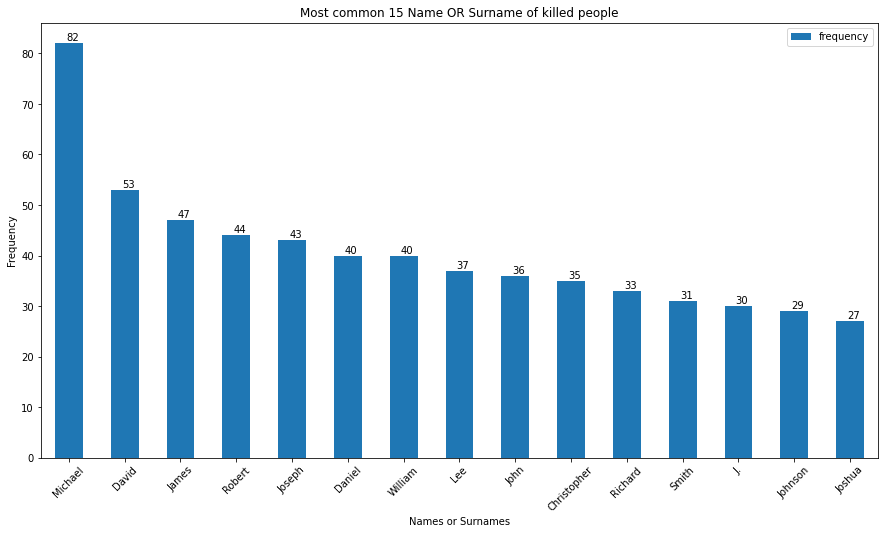

In [ ]:
# with pandas
fig, ax = plt.subplots(figsize=(15,8))
df.plot(rot=45, kind='bar', ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

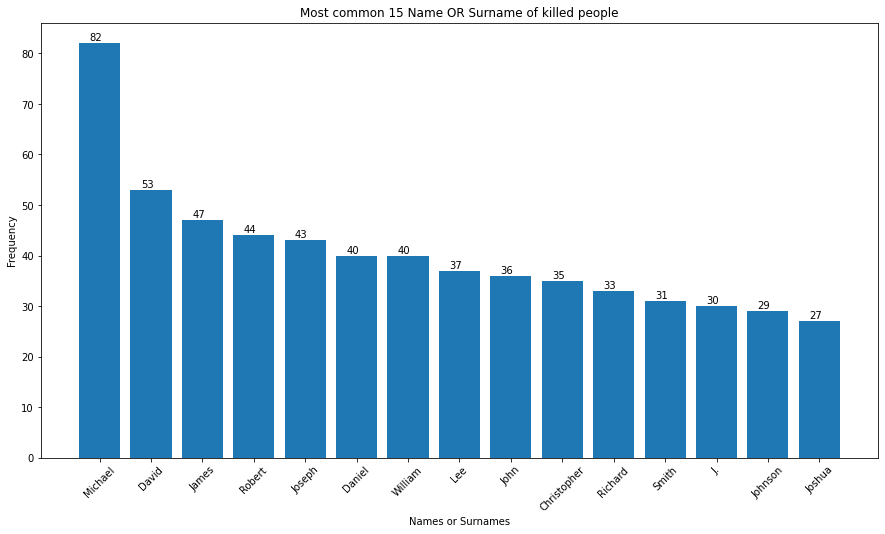

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=df.name_or_surname_most_frequency, height=df.frequency)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")

ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [ ]:
table2=[]
for i in pairs:
    table2.append(i[-1])
len(table2)

2253

In [ ]:
sorted(name.items(), key=lambda x: x[1], reverse=True)[:10]

[('Smith', 31),
 ('Johnson', 29),
 ('Jr.', 18),
 ('Williams', 16),
 ('Brown', 14),
 ('Hall', 13),
 ('Hernandez', 13),
 ('Rodriguez', 12),
 ('Jones', 12),
 ('Anderson', 12)]

In [ ]:
df_name = pd.DataFrame(sorted(name.items(), key=lambda x: x[1], reverse=True)[:10],columns=["name","val"])
df_name

,name,val
0,Smith,31
1,Johnson,29
2,Jr.,18
3,Williams,16
4,Brown,14
5,Hall,13
6,Hernandez,13
7,Rodriguez,12
8,Jones,12
9,Anderson,12


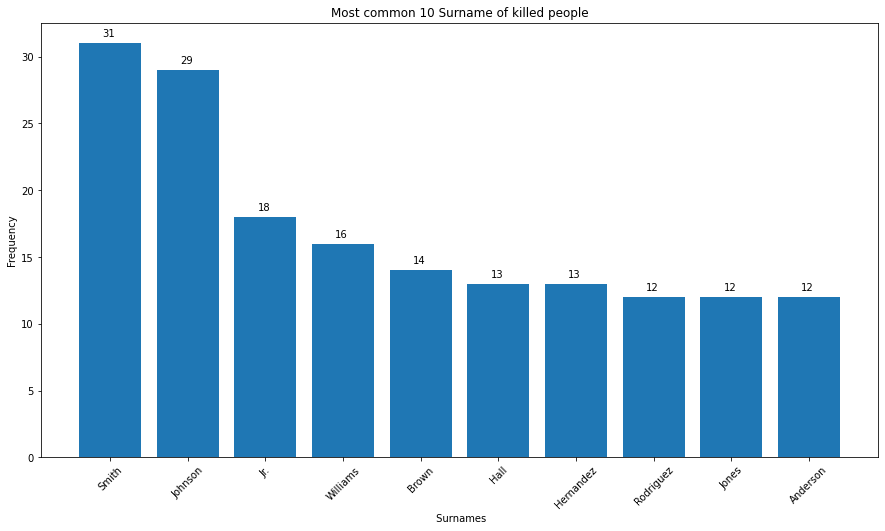

In [ ]:
# with matplotlib
x=df_name.name
y=df_name.val

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=x, height=y)

ax.set_ylabel("Frequency")
ax.set_xlabel(" Surnames")
ax.set_title("Most common 10 Surname of killed people")
ax.set_xticklabels(x, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.5));